## Customer Retention Retail
About this Dataset

This dataset can be used to understand what are the various marketing strategy based on consumer behaviour that can be adopted to increase customer retention of a retail store.

An online tea retail store which sells tea of different flavors across various cities in India. The dataset contains data about the store's customers, their orders, quantity ordered, order frequency, city,etc. This is a large dataset which will help in analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_dict = pd.read_excel("storedata_total.xlsx", sheet_name="data dictionary", header=None)
data_dict

,0,1
0,custid,Computer generated ID to identify customers th...
1,retained,"1, if customer is assumed to be active, 0 = ot..."
2,created,Date when the contact was created in the datab...
3,firstorder,Date when the customer placed first order
4,lastorder,Date when the customer placed last order
5,esent,Number of emails sent
6,eopenrate,Number of emails opened divided by number of e...
7,eclickrate,Number of emails clicked divided by number of ...
8,avgorder,Average order size for the customer
9,ordfreq,Number of orders divided by customer tenure


In [3]:
data = pd.read_excel("storedata_total.xlsx")
data.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


### 요약 통계량 확인 및 데이터 전처리

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30801 entries, 0 to 30800
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   custid      30781 non-null  object        
 1   retained    30801 non-null  int64         
 2   created     30781 non-null  datetime64[ns]
 3   firstorder  30781 non-null  object        
 4   lastorder   30781 non-null  object        
 5   esent       30801 non-null  int64         
 6   eopenrate   30801 non-null  float64       
 7   eclickrate  30801 non-null  float64       
 8   avgorder    30801 non-null  float64       
 9   ordfreq     30801 non-null  float64       
 10  paperless   30801 non-null  int64         
 11  refill      30801 non-null  int64         
 12  doorstep    30801 non-null  int64         
 13  favday      30801 non-null  object        
 14  city        30801 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 3.

In [5]:
data.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
retained,30801.0,0.794520,0.404059,0.0,1.000000,1.000000,1.000000,1.00
esent,30801.0,28.138405,16.751380,0.0,16.000000,32.000000,42.000000,291.00
eopenrate,30801.0,25.554838,29.557106,0.0,2.040816,13.207547,40.000000,100.00
eclickrate,30801.0,5.671139,10.561704,0.0,0.000000,0.000000,7.142857,100.00
avgorder,30801.0,61.873944,41.007588,0.0,40.020000,50.970000,74.280000,2600.14
ordfreq,30801.0,0.037729,0.103932,0.0,0.000000,0.000000,0.040816,3.25
paperless,30801.0,0.649037,0.477279,0.0,0.000000,1.000000,1.000000,1.00
refill,30801.0,0.095094,0.293350,0.0,0.000000,0.000000,0.000000,1.00
doorstep,30801.0,0.038895,0.193347,0.0,0.000000,0.000000,0.000000,1.00


#### 인사이트
- 리텐션율은 79%로 상당히 높은 수치
- 이메일 관련 피처들은 3분위수 수치와 Max값 간의 차이가 큰 것 체크 (이상치 추정)
- 평균 주문량 관련해서도 Max값의 특이값 고객이 존재
- 주문빈도 평균 값이 1이 안되는 것으로 보아, 구매빈도가 높지 않은 비즈니스로 추정
- Subscription 옵션에 따른 Paperless / Refill / Doorstep간 차이가 있는 것 확인

In [6]:
data.describe(include="object").T

,count,unique,top,freq
custid,30781,30769,JC6YFC,2
firstorder,30781,2672,2013-09-17 00:00:00,197
lastorder,30781,2414,2014-01-13 00:00:00,339
favday,30801,7,Monday,6762
city,30801,4,BOM,11566


In [7]:
data.groupby("created")["custid"].count().reset_index().sort_values(by="created")

,created,custid
0,2008-06-17,1
1,2008-07-05,1
2,2008-07-07,1
3,2008-07-10,1
4,2008-07-17,1
...,...,...
2816,2018-01-13,13
2817,2018-01-14,15
2818,2018-01-15,26
2819,2018-01-16,17


In [8]:
data.isnull().sum()

custid        20
retained       0
created       20
firstorder    20
lastorder     20
esent          0
eopenrate      0
eclickrate     0
avgorder       0
ordfreq        0
paperless      0
refill         0
doorstep       0
favday         0
city           0
dtype: int64

In [9]:
null_columns = data.columns[data.isnull().sum().values != 0].tolist()
index_list = None
for name in null_columns:
    if index_list is None:
        name = str(name)
        index_list = data[data[name].isna()].index
        print(index_list)
    else:
        name = str(name)
        judgement = index_list.equals(data[data[name].isna()].index)
        print(judgement)
        if judgement:
            index_list = data[data[name].isna()].index

Int64Index([  146,   180,   803,   931,  1961,  2230,  2780,  2847,  3475,
             4262,  5470,  5715,  7824,  8041, 11471, 11657, 12205, 25111,
            25843, 26019],
           dtype='int64')
True
True
True


In [10]:
data = data.dropna()
data = data.reset_index(drop=True)
data.isnull().sum()

custid        0
retained      0
created       0
firstorder    0
lastorder     0
esent         0
eopenrate     0
eclickrate    0
avgorder      0
ordfreq       0
paperless     0
refill        0
doorstep      0
favday        0
city          0
dtype: int64

#### 인사이트
- custid, created, firstorder, lastorder 각각의 20개 결측치 속한 행 인덱스 체크
- 모두 동일한 행으로 확인하여 결측치로 판단하여 제거

In [11]:
data.describe(include=np.object).T

,count,unique,top,freq
custid,30781,30769,JC6YFC,2
firstorder,30781,2672,2013-09-17 00:00:00,197
lastorder,30781,2414,2014-01-13 00:00:00,339
favday,30781,7,Monday,6759
city,30781,4,BOM,11560


In [12]:
ind = data.groupby("custid")["custid"].count().values > 1
ind = data.groupby("custid")["custid"].count().to_frame().loc[ind].index.tolist()
data.loc[data["custid"].isin(ind)].sort_values(by="custid").head(10)

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
30256,3TXFZX,1,2017-12-13,2017-12-13 00:00:00,2017-12-13 00:00:00,22,50.000000,13.636364,29.00,0.000000,1,0,0,Saturday,BLR
22539,3TXFZX,1,2013-12-12,2013-12-12 00:00:00,2013-12-12 00:00:00,16,25.000000,0.000000,29.00,0.000000,1,0,0,Saturday,BLR
15443,5BKGH2,0,2011-03-27,2011-03-29 00:00:00,1/0/00,11,27.272727,0.000000,57.92,0.048077,0,0,0,Tuesday,BOM
26868,5BKGH2,0,2015-03-28,2015-03-30 00:00:00,00:00:00,0,0.000000,0.000000,57.92,0.000000,0,0,0,Tuesday,BOM
23288,EQTCV3,1,2013-10-22,2013-12-14 00:00:00,2013-12-14 00:00:00,14,28.571429,0.000000,40.02,0.000000,1,1,0,Friday,BOM
22763,EQTCV3,1,2013-10-22,2013-12-14 00:00:00,2013-12-14 00:00:00,25,12.000000,8.000000,40.02,0.000000,1,1,0,Friday,BOM
9123,GAWC5Y,1,2011-03-08,2012-06-25 00:00:00,1/0/00,40,20.000000,0.000000,27.95,0.000000,0,0,0,Monday,BOM
18576,GAWC5Y,0,2011-03-08,2012-06-25 00:00:00,1/0/00,1,100.000000,0.000000,27.95,0.000000,0,0,0,Monday,BOM
4815,JC6YFC,1,2012-07-24,2013-06-07 00:00:00,1/0/00,30,100.000000,6.666667,51.48,0.000000,0,0,0,Friday,DEL
28584,JC6YFC,0,2016-07-25,2017-06-08 00:00:00,00:00:00,6,16.666667,0.000000,51.48,0.000000,0,0,0,Friday,DEL


In [13]:
data = data.drop(["custid"], axis=1).drop_duplicates()
data = data.reset_index(drop=True)
data.head()

,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,1,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


#### 인사이트
- custid 컬럼은 고유 인덱스 값이 아니다. 2개씩 겹치는 아이디가 존재함
- 아이디가 겹치는 행 데이터가 완전 동일한 데이터가 아니므로, 삭제하기 않기로 함
- 대신 아이디 컬럼은 인덱스로 활용하기 어렵다고 판단하여 삭제
- 아이디 컬럼 제거 후, 완전히 데이터가 겹치는 행만 중복값으로 판단하여 삭제

In [14]:
data.shape

(30687, 14)

In [15]:
first_order = data.loc[data["firstorder"] == "1/0/00", "firstorder"].index
fill_values = data.loc[first_order, "created"]
data.loc[first_order, "firstorder"] = fill_values

last_order = data.loc[data["lastorder"] == "1/0/00", "lastorder"].index
fill_values = data.loc[last_order, "firstorder"]
data.loc[last_order, "lastorder"] = fill_values

In [16]:
data["firstorder"] = pd.to_datetime(data["firstorder"].astype(str))
data["lastorder"] = pd.to_datetime(data["lastorder"].astype(str))

In [33]:
data["create_first"] = (data["firstorder"] - data["created"])  / np.timedelta64(1, "D")
data["first_last"] = (data["lastorder"] - data["firstorder"]) / np.timedelta64(1, "D")

#### 인사이트
- "1/0/00"이라는 데이터 값을 계정 생성한 날짜로 변환
- 날짜관련 피처들의 데이터 타입을 Datetime으로 변환 (날짜 데이터간 계산 가능)
- create_first 피처 생성 (계정 등록부터 첫 주문 사이 기간 계산)
- first_last 피처 생성 (첫주문부터 마지막 주문 사이 기간 계산)

### EDA

<AxesSubplot:>

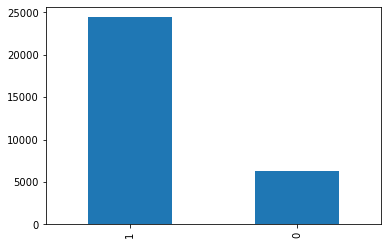

In [17]:
data["retained"].value_counts().plot.bar()

In [18]:
data["retained"].value_counts(normalize=True) * 100

1    79.558119
0    20.441881
Name: retained, dtype: float64

#### 인사이트
- 리텐션 79.5%로 굉장히 높은 수준인 것으로 볼 수 있다

<AxesSubplot:xlabel='created', ylabel='Count'>

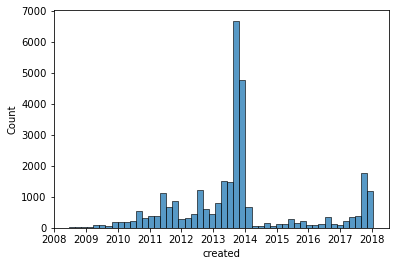

In [19]:
sns.histplot(data=data, x="created", bins=50)

<AxesSubplot:xlabel='firstorder', ylabel='Count'>

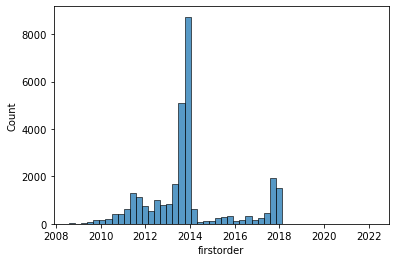

In [20]:
sns.histplot(data=data, x="firstorder", bins=50)

<AxesSubplot:xlabel='lastorder', ylabel='Count'>

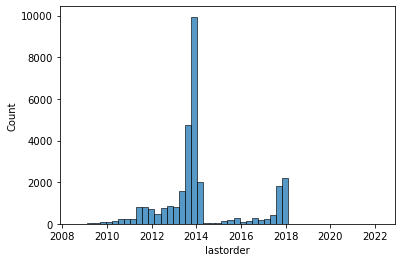

In [21]:
sns.histplot(data=data, x="lastorder", bins=50)

#### 인사이트
- 2013 ~ 2014년도 사이에 고객수와 주문량이 가장 많았다
- 관련 기간에 진행한 마케팅 캠페인과 고객 경험 관리에 대한 분석이 필요함
- 2014년 이후 고객 수와 주문량이 급격히 감소하는 추세가 나타났다

<AxesSubplot:xlabel='esent', ylabel='Count'>

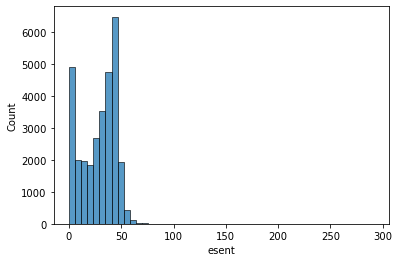

In [22]:
sns.histplot(data, x="esent", bins=50)

In [23]:
data["eopenrate"].value_counts(normalize=True) * 100

0.000000      24.629322
100.000000     3.669306
50.000000      1.626096
33.333333      1.362140
2.222222       1.059080
                ...    
1.612903       0.003259
54.455446      0.003259
32.812500      0.003259
44.230769      0.003259
68.253968      0.003259
Name: eopenrate, Length: 977, dtype: float64

<AxesSubplot:xlabel='eclickrate', ylabel='Count'>

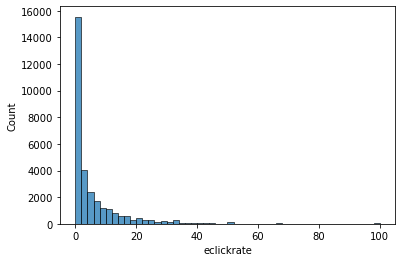

In [24]:
sns.histplot(data=data, x="eclickrate", bins=50)

In [25]:
grouped = data.groupby(["retained", "eclickrate"])["eclickrate"]

# for key, group in grouped:
#     print("* (retained, eclickrate): ", key)
#     print("* group size: ", len(group))
#     print(group.head())
#     print("\n")

* (retained, eclickrate):  (0, 0.0)
* group size:  5195
2     0.0
3     0.0
14    0.0
20    0.0
23    0.0
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (0, 2.272727273)
* group size:  1
26026    2.272727
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (0, 2.380952381)
* group size:  4
1481     2.380952
8698     2.380952
16111    2.380952
24842    2.380952
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (0, 2.43902439)
* group size:  4
645      2.439024
2356     2.439024
4260     2.439024
11723    2.439024
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (0, 2.5)
* group size:  2
8545     2.5
28260    2.5
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (0, 2.564102564)
* group size:  2
24666    2.564103
25288    2.564103
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (0, 2.631578947)
* group size:  1
4285    2.631579
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (0, 2.702702703)
* group

Name: eclickrate, dtype: float64


* (retained, eclickrate):  (1, 12.06896552)
* group size:  1
24770    12.068966
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (1, 12.12121212)
* group size:  39
803     12.121212
2521    12.121212
2592    12.121212
2742    12.121212
2764    12.121212
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (1, 12.19512195)
* group size:  26
796     12.195122
1100    12.195122
1282    12.195122
1694    12.195122
3708    12.195122
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (1, 12.24489796)
* group size:  12
948      12.244898
2020     12.244898
4648     12.244898
11917    12.244898
14952    12.244898
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (1, 12.28070175)
* group size:  2
570      12.280702
18792    12.280702
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (1, 12.5)
* group size:  230
559     12.5
657     12.5
1047    12.5
1091    12.5
1561    12.5
Name: eclickrate, dtype: floa

25667    29.508197
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (1, 29.54545455)
* group size:  1
277    29.545455
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (1, 29.62962963)
* group size:  7
17560    29.62963
19019    29.62963
20886    29.62963
21711    29.62963
29434    29.62963
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (1, 29.72972973)
* group size:  4
5025     29.72973
10202    29.72973
26198    29.72973
28549    29.72973
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (1, 29.78723404)
* group size:  1
15339    29.787234
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (1, 30.0)
* group size:  33
886      30.0
13896    30.0
15913    30.0
16509    30.0
19211    30.0
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (1, 30.23255814)
* group size:  2
1115     30.232558
28985    30.232558
Name: eclickrate, dtype: float64


* (retained, eclickrate):  (1, 30.3030303)
* group size:  5
583      3

In [52]:
(grouped.count().to_frame().rename(columns={"eclickrate":"count"})
                .sort_values(by="eclickrate", ascending=False)
                .head(10))

count
retained eclickrate       
0        100.000000     89
1        90.000000       1
         88.888889       2
         83.333333       1
         82.608696       1
0        75.000000       4
1        75.000000       2
         74.193548       1
         71.428571       2
         70.833333       1

#### 인사이트
- 발송한 이메일을 고객 4명 중에 1명은 열어보지 않는다
- 발송한 이메일의 클릭율 분포가 멱분포를 띈다 (많이 보낼수록 클릭률에 악영향)
- 마케팅 채널로써 이메일 캠페인은 효과적이지 않음을 알 수 있다
- 발송한 이메일을 100% 열어본 고객 중 리텐션이 유지되지 않은 고객 89명 확인
- 이메일과 리텐션과의 상관관계가 크지 않음을 추정할 수 있다

<AxesSubplot:xlabel='avgorder', ylabel='Count'>

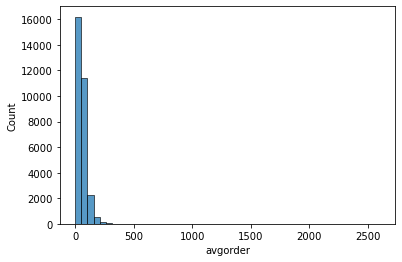

In [54]:
sns.histplot(data=data, x="avgorder", bins=50)

In [78]:
(data["avgorder"] < 55).mean()

0.584188744419461

In [80]:
data["avgorder"].value_counts().head(10)

40.02    3975
40.00     967
35.00     398
40.20     304
31.00     274
40.25     223
35.02     194
29.00     186
45.02     158
31.02     128
Name: avgorder, dtype: int64

#### 인사이트
- 평균적으로 30~40개의 사이즈의 제품을 가장 많이 구매한다 (전체 고객의 22%)
- 55개 밑의 수량으로 구매하는 고객이 전체 고객의 58%를 차지한다

In [29]:
data.loc[data["ordfreq"] < 1, "ordfreq"].count()

30612

In [86]:
print("{} 명".format(data.loc[data["ordfreq"] > 1, "ordfreq"].count()))
data.loc[data["ordfreq"] > 1, "ordfreq"].sort_values(ascending=False).head()

38 명


11043    3.250000
8778     2.142857
681      2.000000
23151    2.000000
20011    2.000000
Name: ordfreq, dtype: float64

In [31]:
data.iloc[11043]

retained                        0
created       2010-04-21 00:00:00
firstorder    2010-09-08 00:00:00
lastorder     2010-09-12 00:00:00
esent                           0
eopenrate                     0.0
eclickrate                    0.0
avgorder                    69.48
ordfreq                      3.25
paperless                       0
refill                          0
doorstep                        0
favday                     Monday
city                          DEL
Name: 11043, dtype: object

In [32]:
data.iloc[8778]

retained                        1
created       2010-10-21 00:00:00
firstorder    2011-02-21 00:00:00
lastorder     2011-02-28 00:00:00
esent                          37
eopenrate                2.702703
eclickrate               2.702703
avgorder                   145.77
ordfreq                  2.142857
paperless                       0
refill                          0
doorstep                        0
favday                     Friday
city                          DEL
Name: 8778, dtype: object

<AxesSubplot:xlabel='create_first', ylabel='Count'>

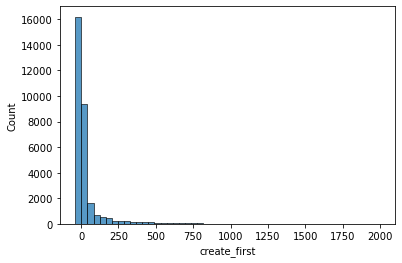

In [34]:
sns.histplot(data=data, x="create_first", bins=50)

In [35]:
data["create_first"].value_counts(normalize=True)

0.0       0.439078
1.0       0.067455
2.0       0.029915
3.0       0.021116
4.0       0.016587
            ...   
1399.0    0.000033
575.0     0.000033
374.0     0.000033
882.0     0.000033
556.0     0.000033
Name: create_first, Length: 874, dtype: float64

<AxesSubplot:>

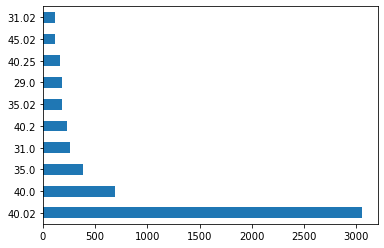

In [36]:
data.loc[data["create_first"] == 0, "avgorder"].value_counts().head(10).plot.barh()

#### 인사이트
- 리텐션이 높음에도 불구하고, 제품 특성상 구매 빈도가 높지 않은 것으로 파악
- 리텐션 보다는 acquisition, activatation, 고객당 매출이 더 적합한 지표로 판단
- 아이디 생성 후 그날 바로 주문하는 고객이 많은 것으로 나타남
- 평균 구매량은 30~40개로 나타난다
- 적합한 마케팅은 바이럴 마케팅으로 지속적인 새로운 고객을 유치하는 게 중요
- 판매 플랫폼에 유입하는 고객이 빠르게 첫 상품 구매까지 진행하도록 만드는 게 중요
- 구매 빈도가 높지 않으므로, 구매시 장바구니에 많은 상품을 어떻게 담도록 할것인가?

<AxesSubplot:xlabel='retained', ylabel='avgorder'>

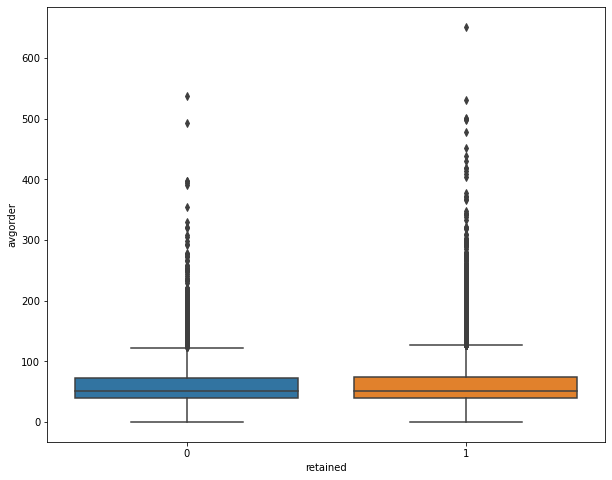

In [38]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data[data["avgorder"] < 900], x="retained", y="avgorder")

<AxesSubplot:xlabel='retained', ylabel='avgorder'>

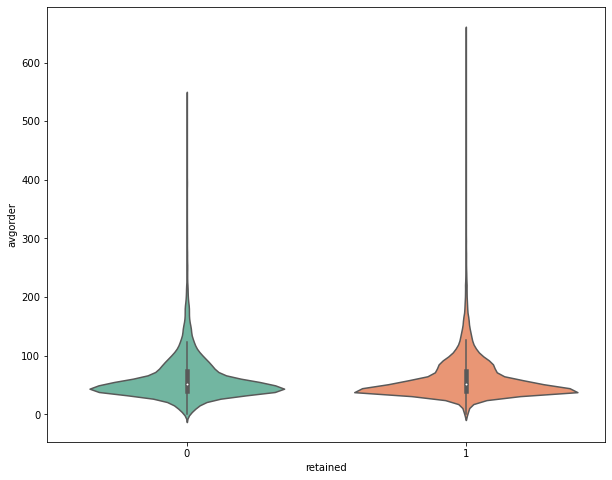

In [39]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=data[data["avgorder"] < 900], x="retained", y="avgorder",
              palette="Set2")

In [40]:
data.groupby("paperless")["retained"].count()

paperless
0    10801
1    19886
Name: retained, dtype: int64

In [90]:
data.groupby(["paperless", "retained"])["avgorder"].count()

paperless  retained
0          0            3289
           1            7512
1          0            2984
           1           16902
Name: avgorder, dtype: int64

In [95]:
data.groupby(["paperless", "retained"])["avgorder"].agg({"mean", "sum", "count"})

count       mean        sum
paperless retained                             
0         0          3289  64.819498  213191.33
          1          7512  72.481652  544482.17
1         0          2984  58.192989  173647.88
          1         16902  57.301282  968506.27

In [97]:
data.groupby(["paperless", "retained"])["ordfreq"].agg({"mean", "count"})

count      mean
paperless retained                 
0         0          3289  0.041997
          1          7512  0.040483
1         0          2984  0.029055
          1         16902  0.037459

In [41]:
data.groupby("refill")["retained"].count()

refill
0    27763
1     2924
Name: retained, dtype: int64

In [42]:
data.groupby("doorstep")["retained"].count()

doorstep
0    29489
1     1198
Name: retained, dtype: int64

#### 인사이트
- 구독 모델의 경우, 리텐션에 긍정적 영향을 미친 옵션은 Paperless임을 볼 수 있다
- Paperless 옵션을 선택한 고객이 더 많은 수량을 구매하는 것은 아니다
- Paperless 모델이 고객의 구매 빈도에 영향을 주는가? Probably Not
- 구매 빈도 자체는 리텐션과 더 상관이 있는 것으로 추정

In [43]:
(data.groupby(["create_first", "retained"])["retained"].count().to_frame()
    .rename(columns={"retained": "count"})
    .reset_index()
)

,create_first,retained,count
0,-39.0,0,55
1,-39.0,1,123
2,-35.0,0,24
3,-35.0,1,65
4,-33.0,0,34
...,...,...,...
1304,1627.0,0,1
1305,1651.0,1,1
1306,1652.0,1,1
1307,1915.0,1,1
